In [1]:
import config as cfg
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

date_cols = ['Visit_Date', 'CNSLS_Date', 'Date of death', 'ALSFRS_Date', 'SymptomOnset_Date']
df = pd.read_csv(Path.joinpath(cfg.DATA_DIR, 'data_all.csv'), index_col=0, parse_dates=date_cols)

In [2]:
df.columns

Index(['PSCID', 'Visit Label', 'Symptom_Duration', 'Visit_details',
       'Visit_Date', 'DiseaseProgressionRate', 'CNSLS_Date',
       'CNSLS_TotalScore', 'Status', 'Date of death', 'Cause of death',
       'ALSFRS_Date', 'ALSFRS_1_Speech', 'ALSFRS_2_Salivation',
       'ALSFRS_3_Swallowing', 'ALSFRS_Bulbar_Subscore', 'ALSFRS_4_Handwriting',
       'ALSFRS_GastrostomyPresent', 'ALSFRS_5_Cuttingfood&handlingutensils',
       'ALSFRS_6_Dressing&hygiene', 'ALSFRS_Fine Motor_subscore',
       'ALSFRS_7_Turninginbed', 'ALSFRS_8_Walking', 'ALSFRS_9_Climbingstairs',
       'ALSFRS_Gross Motor_subscore', 'ALSFRS_10_Dyspnea',
       'ALSFRS_11_Orthopnea', 'ALSFRS_12_RespiratoryInsufficiency',
       'ALSFRS_Breathing_Subscore', 'ALSFRS_TotalScore',
       'TAP_Trial1RightFinger', 'TAP_Trial1LeftFinger',
       'TAP_Trial2RightFinger', 'TAP_Trial2leftFinger', 'TAP_Trial1RightFoot',
       'TAP_Trial1LeftFoot', 'TAP_Trial2RightFoot', 'TAP_Trial2LeftFoot',
       'TAP_Fingertapping_Right_avg', 'T

In [3]:
# Use only ALS patients
df = df.loc[df['Diagnosis'] == 'ALS']

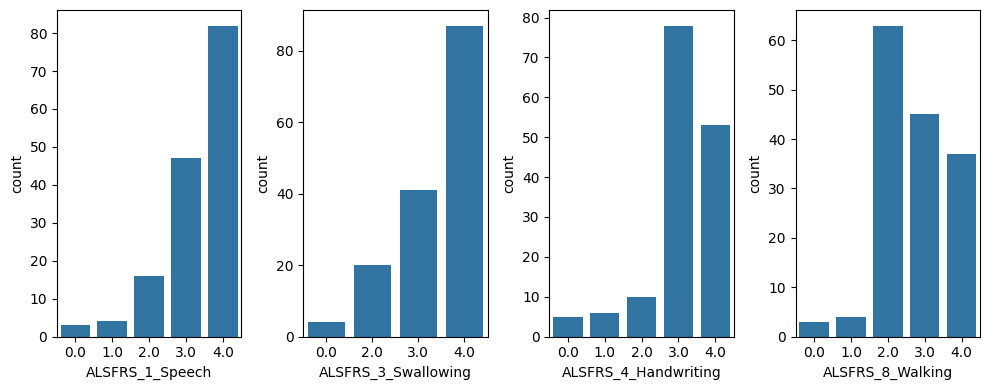

In [4]:
# Plot ALSFRS distribution
alsfrs_cols = ['ALSFRS_1_Speech', 'ALSFRS_3_Swallowing', 'ALSFRS_4_Handwriting', 'ALSFRS_8_Walking']
fig, axs = plt.subplots(ncols=len(alsfrs_cols), figsize=(10,4))
for i, col in enumerate(alsfrs_cols):
    sns.countplot(x=col, data=df, ax=axs[i])
plt.tight_layout()
plt.show()

In [5]:
# Count number of occurances
threshold = 2
for col in alsfrs_cols:
    n_samles_under, n_samples_over = len(df.loc[df[col] <= threshold]), len(df.loc[df[col] > threshold])
    print(f'{n_samles_under} are under {threshold}, {n_samples_over} are over {threshold}')

23 are under 2, 129 are over 2
24 are under 2, 128 are over 2
21 are under 2, 131 are over 2
70 are under 2, 82 are over 2


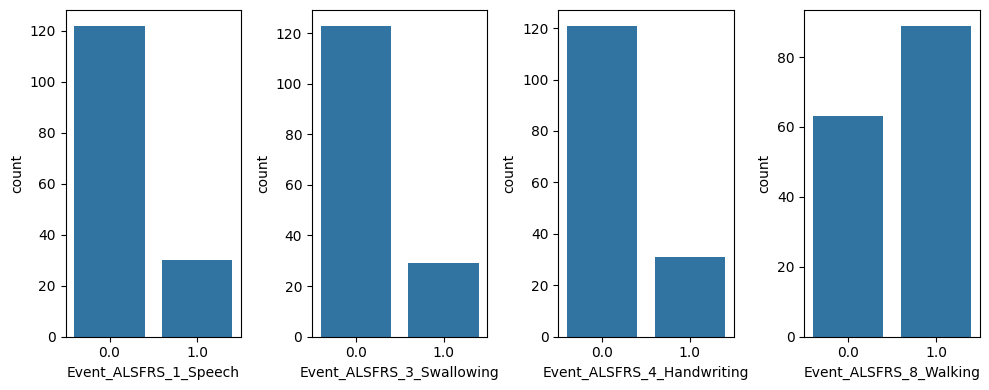

In [6]:
alsfrs_event_cols = ['Event_ALSFRS_1_Speech', 'Event_ALSFRS_3_Swallowing',
                     'Event_ALSFRS_4_Handwriting', 'Event_ALSFRS_8_Walking']
fig, axs = plt.subplots(ncols=len(alsfrs_cols), figsize=(10,4))
for i, col in enumerate(alsfrs_event_cols):
    sns.countplot(x=col, data=df, ax=axs[i])
plt.tight_layout()
plt.show()

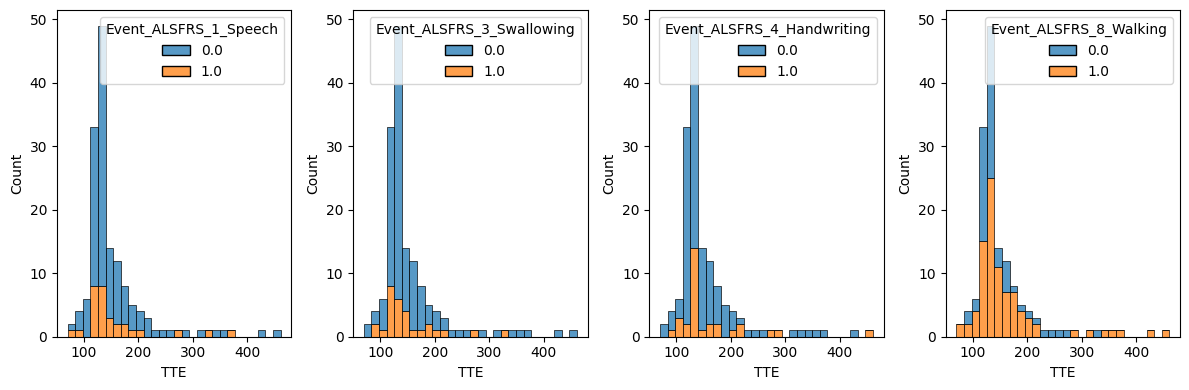

In [7]:
fig, axs = plt.subplots(ncols=len(alsfrs_cols), figsize=(12,4))
for i, col in enumerate(alsfrs_event_cols):
    event = df[['TTE', f'{col}']]
    sns.histplot(x='TTE', data=event, hue=col, multiple="stack", bins="auto", ax=axs[i])
plt.tight_layout()
plt.show()